## <center><font color='DarkBlue'><u>Predicting Salary Using Machine Learning
    

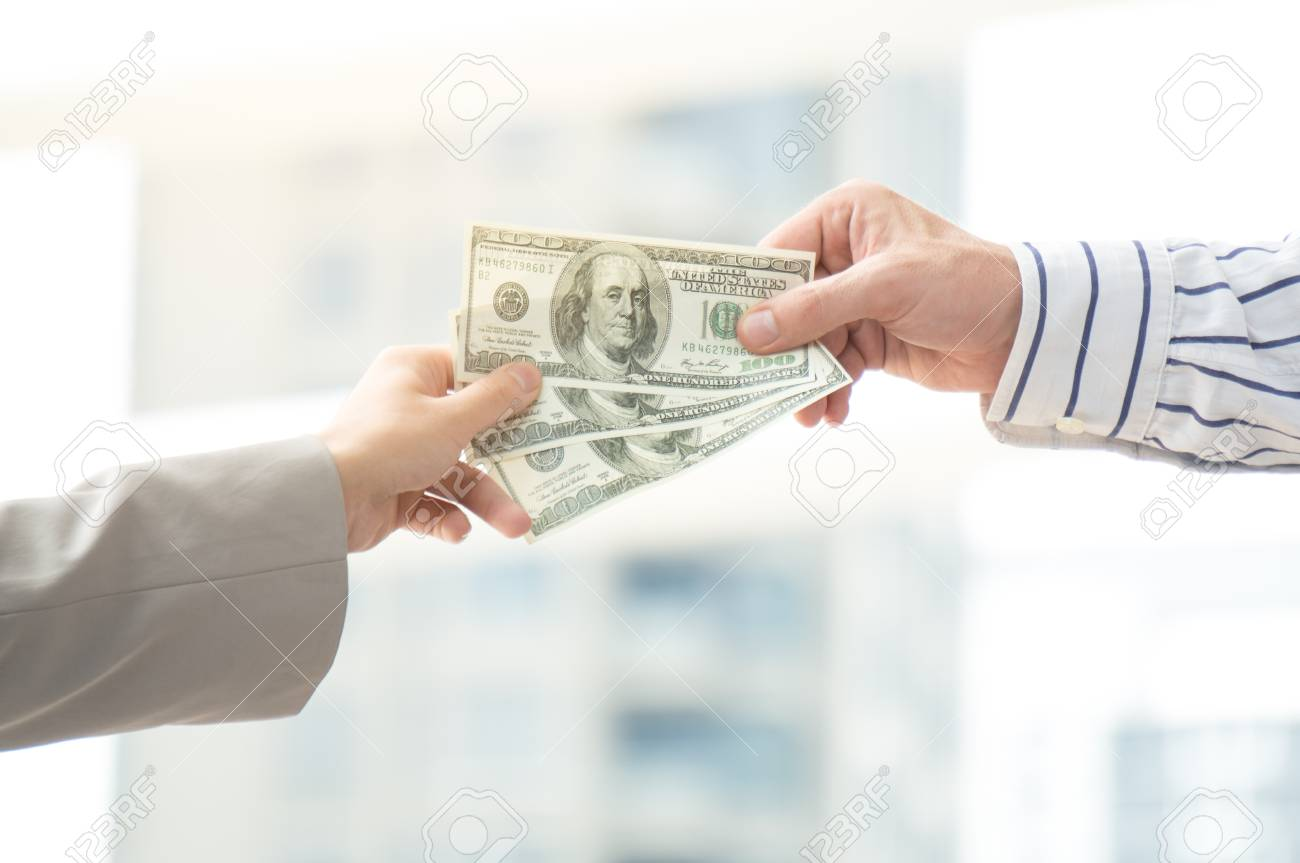<h5><a href="https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race">www.kaggle.com/dataset/Salary_dataset_based_on_Country_and_Race</a>

### Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
data = pd.read_csv('./Salary_Data_Based_country_and_race.csv')
data

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


### Summary of the Dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


### Checking Names Of Columns

In [4]:
data.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'],
      dtype='object')

### Checking Number of rows and Columns

In [5]:
data.shape

(6704, 9)

### Checking Null Values

In [6]:
data.isnull().mean()*100

Unnamed: 0             0.000000
Age                    0.029833
Gender                 0.029833
Education Level        0.044749
Job Title              0.029833
Years of Experience    0.044749
Salary                 0.074582
Country                0.000000
Race                   0.000000
dtype: float64

### Description of the data

In [7]:
data.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


### Dropping Unwanted Column

In [8]:
data.drop(columns='Unnamed: 0',inplace=True)

### Renaming Column

In [9]:
data.rename(columns={"Education Level":"EducationLevel","Job Title":"JobTitle","Years of Experience":"YearsofExperience"},inplace=True)

### Formatting  Values in Columns

In [10]:
data['EducationLevel']=data['EducationLevel'].replace("Bachelor's Degree","Bachelor's")
data['EducationLevel']=data['EducationLevel'].replace("Master's Degree","Master's")
data['EducationLevel']=data['EducationLevel'].replace("PhD","phD")

### Boxplot

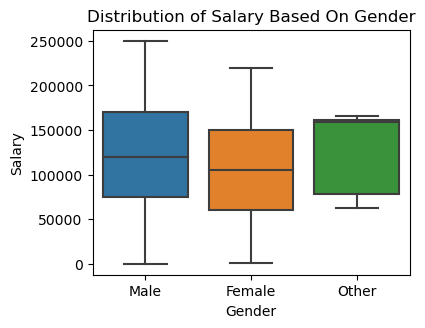

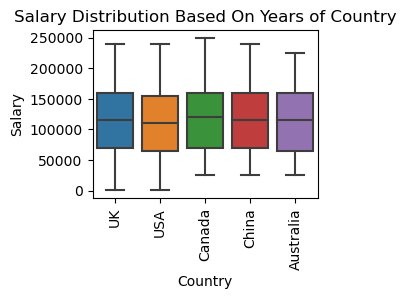

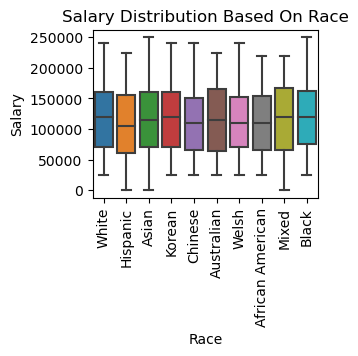

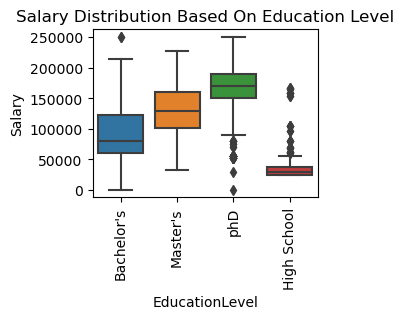

In [11]:
plt.figure(figsize=(9,7))

plt.subplot(2,2,1)
sns.boxplot(data=data,x='Gender',y='Salary')
plt.title("Distribution of Salary Based On Gender")
plt.show()

plt.subplot(2,2,2)
sns.boxplot(data=data,x='Country',y='Salary')
plt.title("Salary Distribution Based On Years of Country")
plt.xticks(rotation=90)
plt.show()


plt.subplot(2,2,3)
sns.boxplot(data=data,x='Race',y='Salary')
plt.title("Salary Distribution Based On Race")
plt.xticks(rotation=90)
plt.show()

plt.subplot(2,2,4)
sns.boxplot(data=data,x='EducationLevel',y='Salary')
plt.title("Salary Distribution Based On Education Level")
plt.xticks(rotation=90)
plt.show()



### Barplot

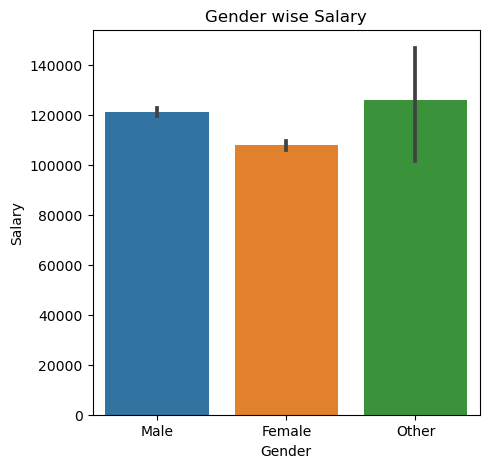

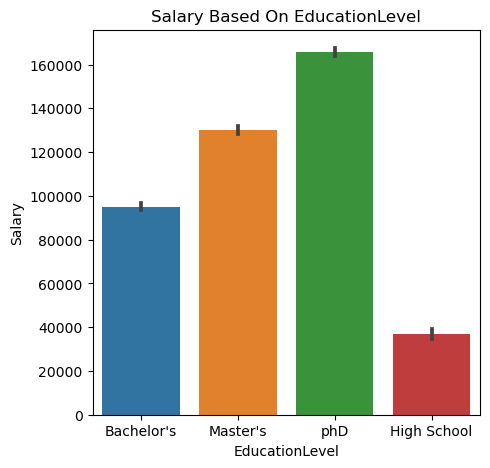

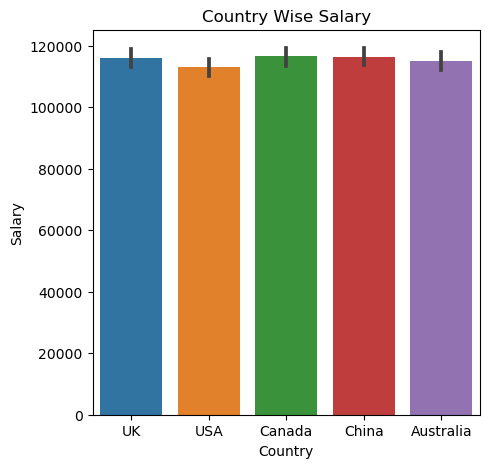

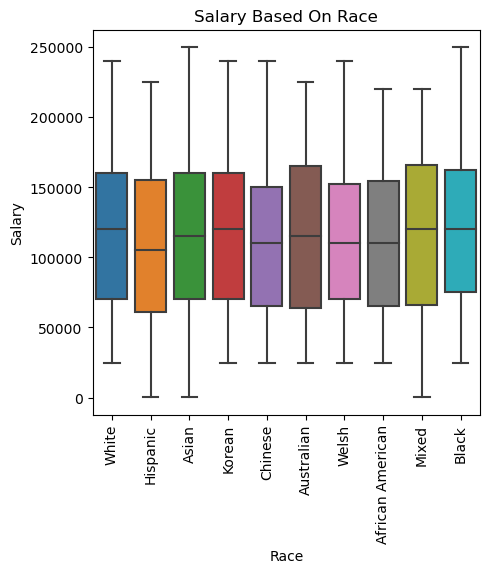

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(data=data,x="Gender",y="Salary")
plt.title("Gender wise Salary")
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(data=data,x="EducationLevel",y="Salary")
plt.title("Salary Based On EducationLevel")
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(data=data,x="Country",y="Salary")
plt.title("Country Wise Salary")
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(data=data,x='Race',y='Salary')
plt.xticks(rotation=90)
plt.title("Salary Based On Race")
plt.show()

### LinePlot 

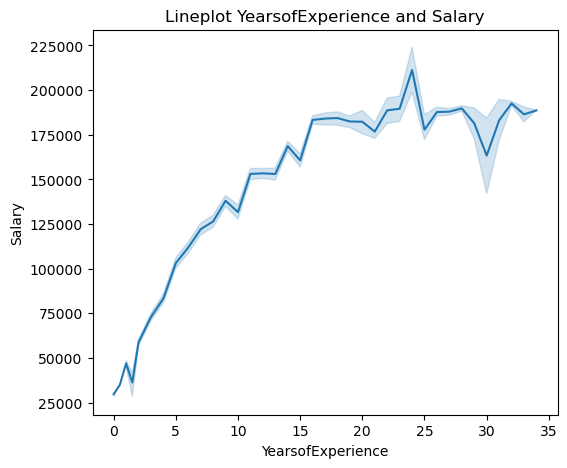

In [13]:
plt.figure(figsize=(6,5))
plt.xlabel('YearsofExperience')
plt.ylabel('Salary')
sns.lineplot(data=data,x='YearsofExperience',y='Salary')
plt.title("Lineplot YearsofExperience and Salary")
plt.show()

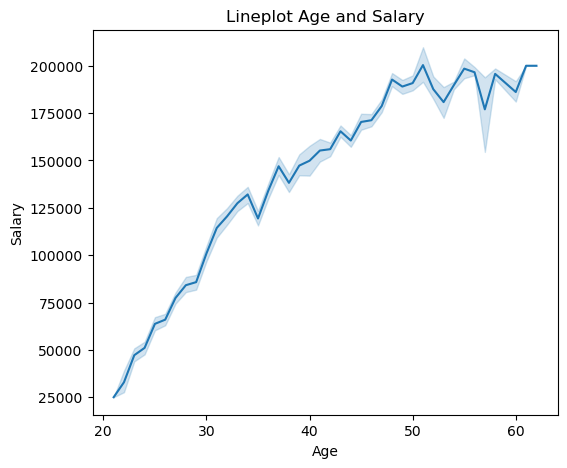

In [14]:
plt.figure(figsize=(6,5))
plt.xlabel('Age')
plt.ylabel('Salary')
sns.lineplot(data=data,x='Age',y='Salary')
plt.title("Lineplot Age and Salary")
plt.show()

### Scatterplot

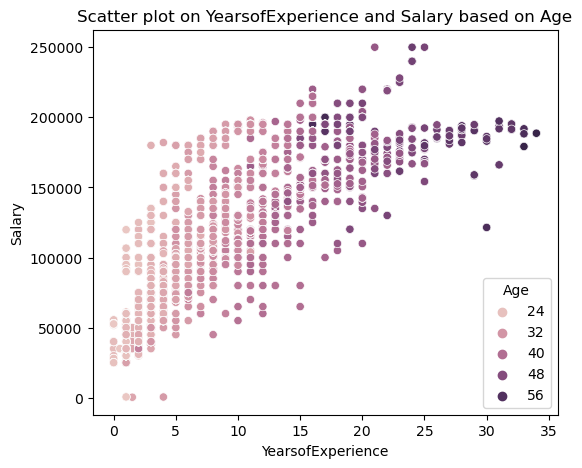

In [15]:

plt.figure(figsize=(6,5))
sns.scatterplot(data=data,x='YearsofExperience',y='Salary',hue='Age')
plt.title("Scatter plot on YearsofExperience and Salary based on Age")
plt.show()


### Plotting Top 20 JobTitle

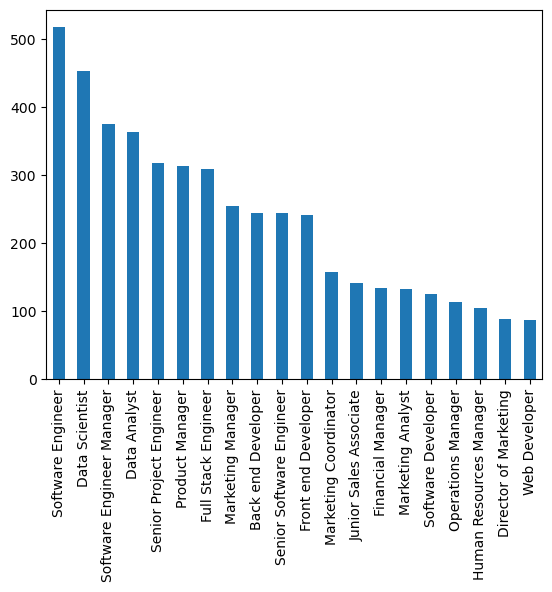

In [16]:
top_JobTitle = (data["JobTitle"].value_counts()).iloc[:20]
top_JobTitle.plot(kind='bar');

### Top Job with HighSalary

In [17]:
Top_10_Job_and_Salary = data.groupby(['JobTitle'])['Salary'].mean().sort_values(ascending=False)
Top_10_Job_and_Salary

JobTitle
CEO                                   250000.000000
Chief Technology Officer              250000.000000
Chief Data Officer                    220000.000000
Director of Data Science              204561.403509
VP of Finance                         200000.000000
                                          ...      
Junior Sales Associate                 28211.267606
Delivery Driver                        28000.000000
Receptionist                           25000.000000
Junior Business Operations Analyst     17675.000000
Social M                                        NaN
Name: Salary, Length: 193, dtype: float64

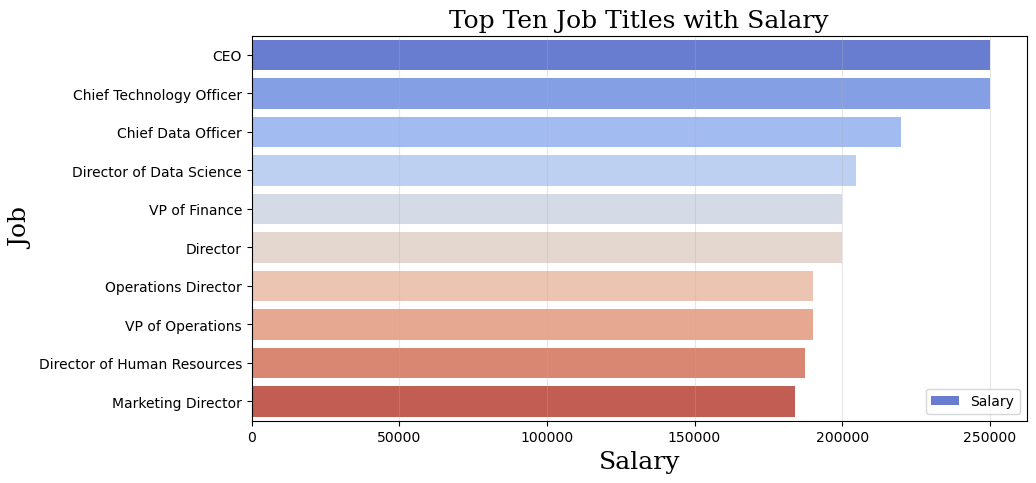

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(y=Top_10_Job_and_Salary[:10].index,x=Top_10_Job_and_Salary[:10].values,palette="coolwarm",label ="Salary")
font={'family':'serif',
     'color':'Black',
     'size':18}
plt.xlabel("Salary",fontdict=font)
plt.ylabel("Job",fontdict=font)
plt.title("Top Ten Job Titles with Salary",fontdict=font)
plt.grid(axis = "x", alpha = .3)
plt.legend()
plt.show()


### Plotting Job with LowSalary

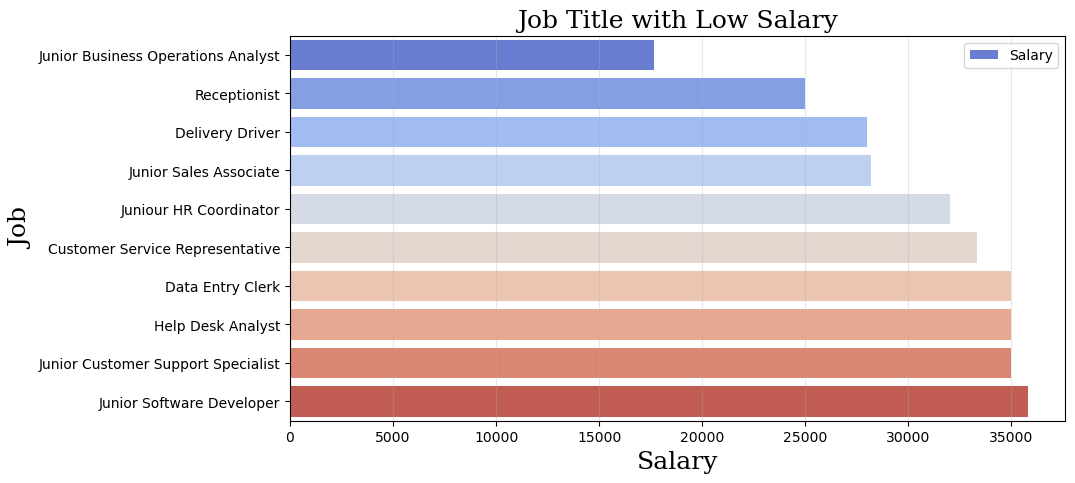

In [19]:
Job_with_LowSalary = data.groupby(['JobTitle'])['Salary'].mean().sort_values(ascending=True)
Job_with_LowSalary


plt.figure(figsize=(10,5))
sns.barplot(y=Job_with_LowSalary[:10].index,x=Job_with_LowSalary[:10].values,palette="coolwarm",label ="Salary")
font={'family':'serif',
     'color':'Black',
     'size':18}
plt.xlabel("Salary",fontdict=font)
plt.ylabel("Job",fontdict=font)
plt.title("Job Title with Low Salary",fontdict=font)
plt.grid(axis = "x", alpha = .3)
plt.legend()
plt.show()


### Pie Plot

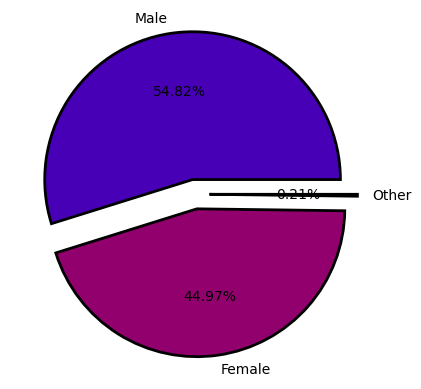

In [20]:
palette_color=sns.color_palette('brg')
plt.pie(data=data,x=data.Gender.value_counts(),explode=[0.1,0.1,0.1],colors=palette_color,autopct='%0.2f%%',startangle = 0,
        wedgeprops = {"edgecolor" : "black",
                    'linewidth' : 2,
                    'antialiased': True},labels=['Male','Female','Other'])
plt.show()

#### <font color='darkblue'>From this plot we can understand that Males have higher Oppurunities than other Gender

###  Data's of Data Scientist

In [21]:
def sort_function(JobTitle):
    data_job = data[data.JobTitle==JobTitle ]
    data_job.drop(columns='JobTitle',inplace=True)
    return data_job

In [22]:
data_scientist = sort_function('Data Scientist')
data_scientist

,Age,Gender,EducationLevel,YearsofExperience,Salary,Country,Race
32,29.0,Male,Master's,3.0,75000.0,USA,Hispanic
375,31.0,Male,Master's,6.0,160000.0,Australia,White
379,30.0,Male,phD,5.0,180000.0,China,Korean
383,33.0,Male,phD,8.0,190000.0,UK,Mixed
387,27.0,Male,phD,2.0,115000.0,USA,African American
...,...,...,...,...,...,...,...
6202,32.0,Female,phD,9.0,145000.0,China,Korean
6216,32.0,Female,phD,9.0,145000.0,China,White
6230,32.0,Female,phD,9.0,145000.0,UK,Asian
6244,32.0,Female,phD,9.0,145000.0,USA,Asian


### Pie Plot Showing Gender on DataScientist Field


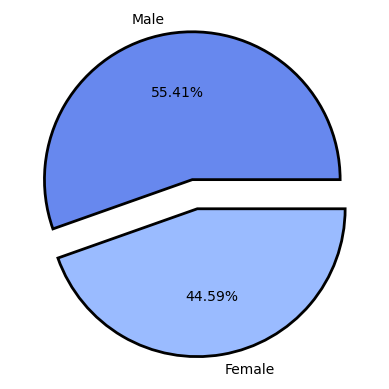

In [23]:
palette_color=sns.color_palette('coolwarm')
plt.pie(data=data_scientist,x=data_scientist.Gender.value_counts(),explode=[0.1,0.1],colors=palette_color,autopct='%0.2f%%',startangle = 0,
        wedgeprops = {"edgecolor" : "black",
                    'linewidth' : 2,
                    'antialiased': True},labels=['Male','Female'])
plt.show()

#### <font color='darkblue'>From this plot we can understand that Males works more as Datascientist

### Plotting Datascientist salary based on Country

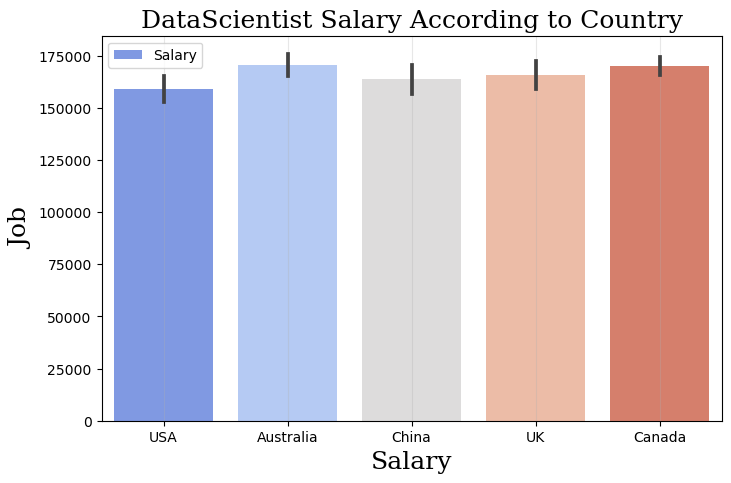

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=data_scientist,x= 'Country',y="Salary",palette="coolwarm",label ="Salary")
font={'family':'serif',
     'color':'Black',
     'size':18}
plt.xlabel("Salary",fontdict=font)
plt.ylabel("Job",fontdict=font)
plt.title("DataScientist Salary According to Country",fontdict=font)
plt.grid(axis = "x", alpha = .3)
plt.legend()
plt.show()

### Plotting Datascientist salary based on Race

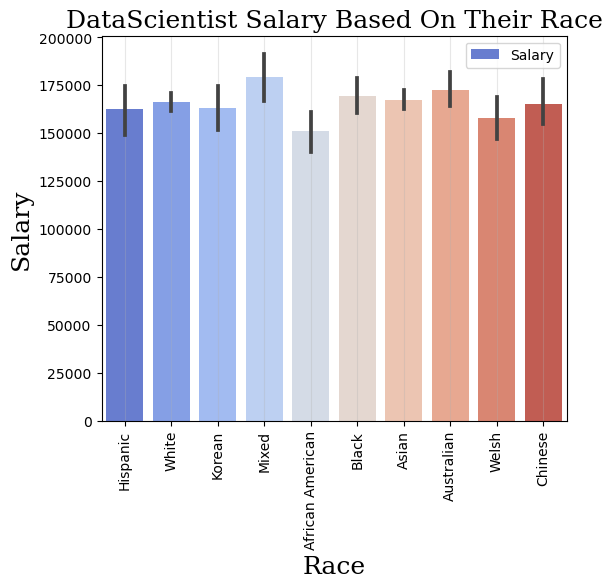

In [25]:
plt.figure(figsize=(6,5))
sns.barplot(data=data_scientist,x= 'Race',y="Salary",palette="coolwarm",label ="Salary")
font={'family':'serif',
     'color':'Black',
     'size':18}
plt.xlabel("Race",fontdict=font)
plt.ylabel("Salary",fontdict=font)
plt.xticks(rotation =90)
plt.title("DataScientist Salary Based On Their Race",fontdict=font)
plt.grid(axis = "x", alpha = .3)
plt.legend()
plt.show()

### Plotting Datascientist salary based on Qualification

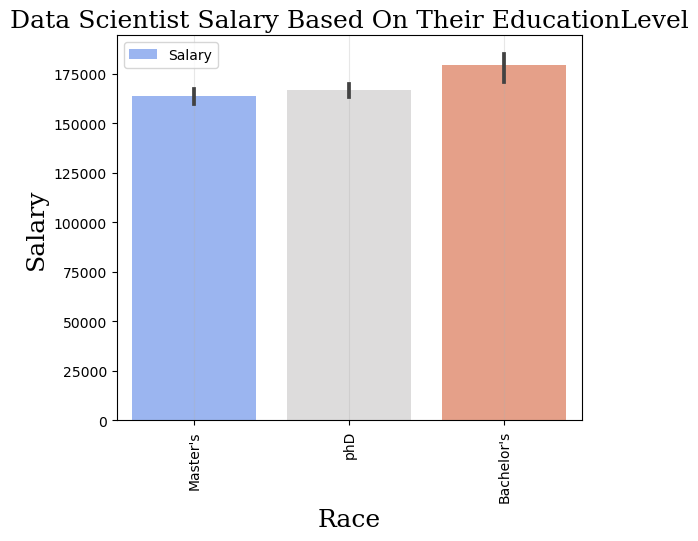

In [26]:
plt.figure(figsize=(6,5))
sns.barplot(data=data_scientist,x= 'EducationLevel',y="Salary",palette="coolwarm",label ="Salary")
font={'family':'serif',
     'color':'Black',
     'size':18}
plt.xlabel("Race",fontdict=font)
plt.ylabel("Salary",fontdict=font)
plt.xticks(rotation =90)
plt.title("Data Scientist Salary Based On Their EducationLevel",fontdict=font)
plt.grid(axis = "x", alpha = .3)
plt.legend()
plt.show()

### Lineplot on Data Scientist Data

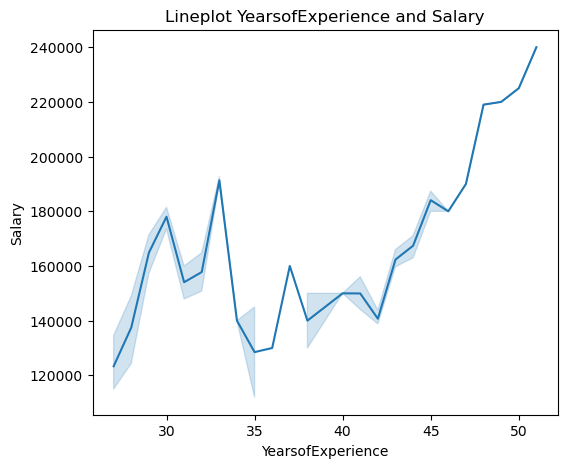

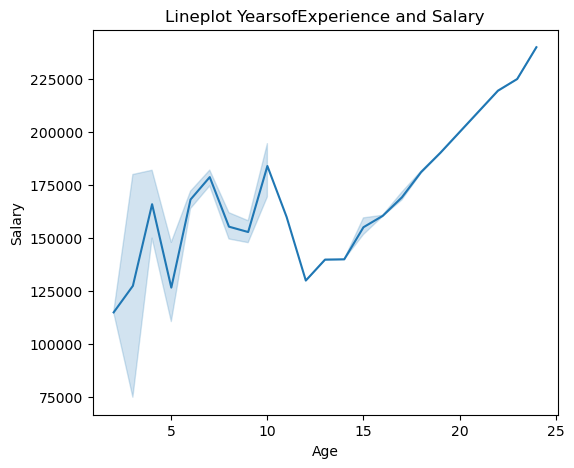

In [27]:
plt.figure(figsize=(6,5))
plt.xlabel('YearsofExperience')
plt.ylabel('Salary')
sns.lineplot(data=data_scientist,x='Age',y='Salary')
plt.title("Lineplot YearsofExperience and Salary")
plt.show()

plt.figure(figsize=(6,5))
plt.xlabel('Age')
plt.ylabel('Salary')
sns.lineplot(data=data_scientist,x='YearsofExperience',y='Salary')
plt.title("Lineplot YearsofExperience and Salary")
plt.show()

### Data's of Data Analyst

In [28]:
data_analyst = sort_function('Data Analyst')
data_analyst

,Age,Gender,EducationLevel,YearsofExperience,Salary,Country,Race
1,28.0,Female,Master's,3.0,65000.0,USA,Hispanic
81,41.0,Female,Master's,13.0,80000.0,USA,White
378,27.0,Female,Bachelor's,2.0,110000.0,UK,Mixed
382,25.0,Female,Master's,1.0,100000.0,China,White
386,30.0,Female,Bachelor's,5.0,145000.0,USA,African American
...,...,...,...,...,...,...,...
3360,34.0,Male,Master's,8.0,100000.0,China,Korean
3367,35.0,Female,Master's,9.0,120000.0,China,White
3374,37.0,Male,Bachelor's,11.0,160000.0,USA,African American
3377,34.0,Male,Master's,8.0,100000.0,USA,Hispanic


### Pieplot on DataAnalyst

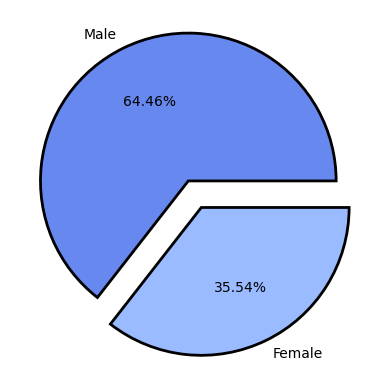

In [29]:
palette_color=sns.color_palette('coolwarm')
plt.pie(data=data_analyst,x=data_analyst.Gender.value_counts(),explode=[0.1,0.1],colors=palette_color,autopct='%0.2f%%',startangle = 0,
        wedgeprops = {"edgecolor" : "black",
                    'linewidth' : 2,
                    'antialiased': True},labels=['Male','Female'])
plt.show()

#### <font color='darkblue'>From this plot we can understand that Males works more as DataAnalysist

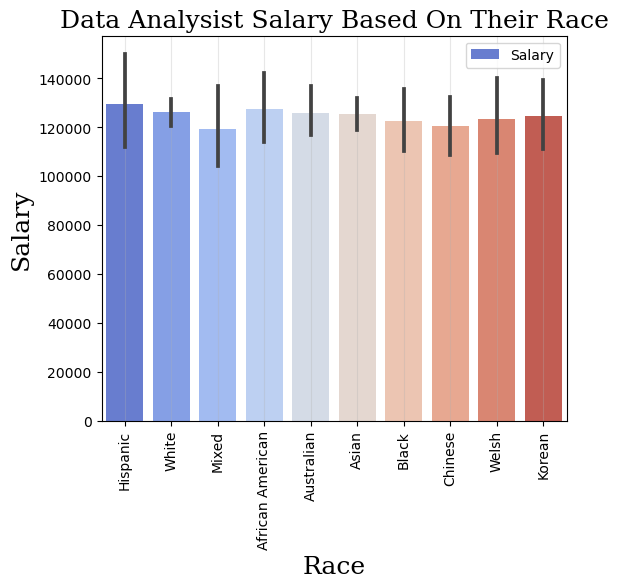

In [30]:
plt.figure(figsize=(6,5))
sns.barplot(data=data_analyst,x= 'Race',y="Salary",palette="coolwarm",label ="Salary")
font={'family':'serif',
     'color':'Black',
     'size':18}
plt.xlabel("Race",fontdict=font)
plt.ylabel("Salary",fontdict=font)
plt.xticks(rotation =90)
plt.title("Data Analysist Salary Based On Their Race",fontdict=font)
plt.grid(axis = "x", alpha = .3)
plt.legend()
plt.show()

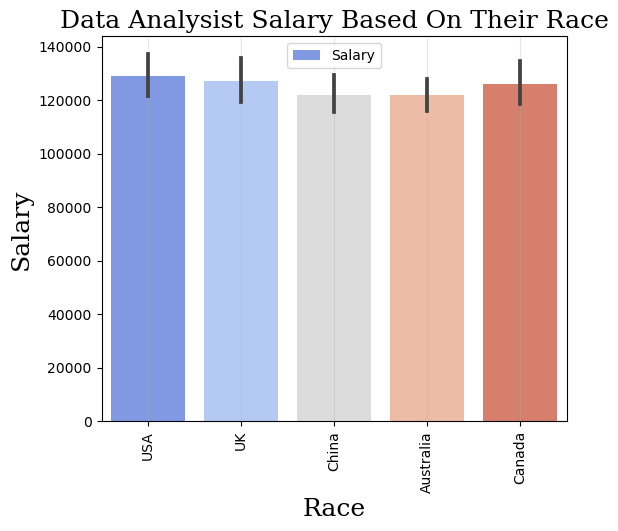

In [31]:
plt.figure(figsize=(6,5))
sns.barplot(data=data_analyst,x= 'Country',y="Salary",palette="coolwarm",label ="Salary")
font={'family':'serif',
     'color':'Black',
     'size':18}
plt.xlabel("Race",fontdict=font)
plt.ylabel("Salary",fontdict=font)
plt.xticks(rotation =90)
plt.title("Data Analysist Salary Based On Their Race",fontdict=font)
plt.grid(axis = "x", alpha = .3)
plt.legend()
plt.show()

### Plotting DataAnalysist salary based on Qualification

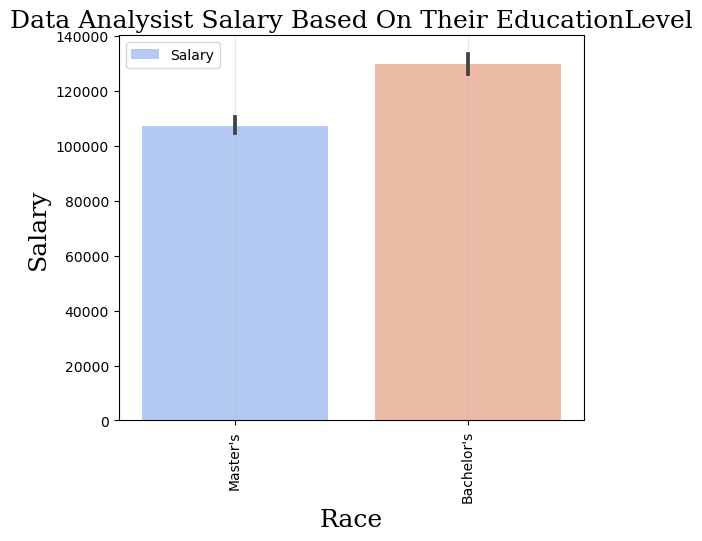

In [32]:
plt.figure(figsize=(6,5))
sns.barplot(data=data_analyst,x= 'EducationLevel',y="Salary",palette="coolwarm",label ="Salary")
font={'family':'serif',
     'color':'Black',
     'size':18}
plt.xlabel("Race",fontdict=font)
plt.ylabel("Salary",fontdict=font)
plt.xticks(rotation =90)
plt.title("Data Analysist Salary Based On Their EducationLevel",fontdict=font)
plt.grid(axis = "x", alpha = .3)
plt.legend()
plt.show()

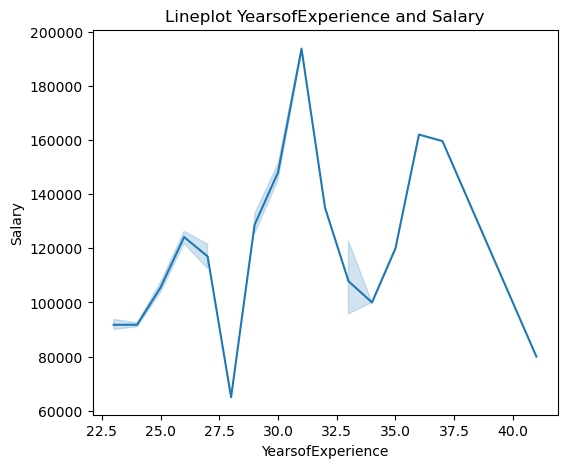

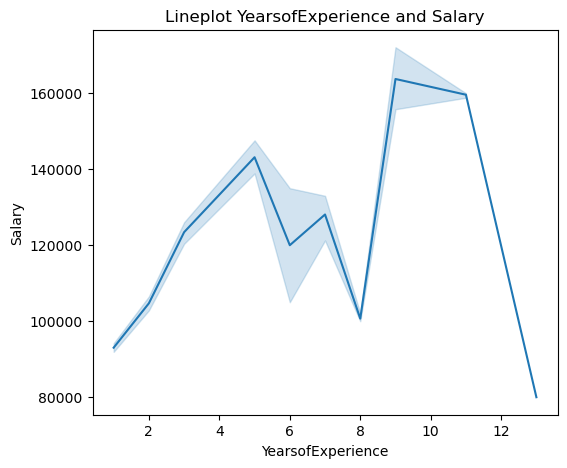

In [33]:
plt.figure(figsize=(6,5))
plt.xlabel('YearsofExperience')
plt.ylabel('Salary')
sns.lineplot(data=data_analyst,x='Age',y='Salary')
plt.title("Lineplot YearsofExperience and Salary")
plt.show()
plt.figure(figsize=(6,5))
plt.xlabel('YearsofExperience')
plt.ylabel('Salary')
sns.lineplot(data=data_analyst,x='YearsofExperience',y='Salary')
plt.title("Lineplot YearsofExperience and Salary")
plt.show()

### Heat Map on Dataset

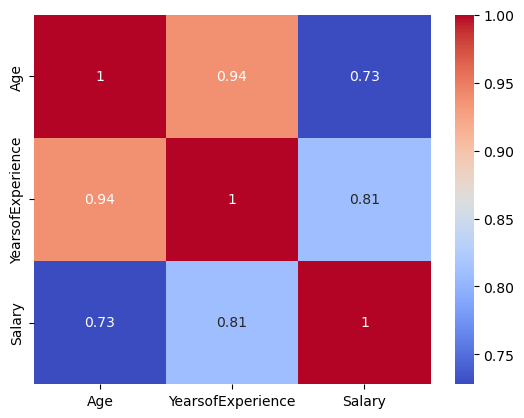

In [34]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm");

In [35]:
### creating 

In [36]:

df =  data[['JobTitle','Gender', 'EducationLevel', 'Country', 'Race','Age',
       'YearsofExperience', 'Salary']].copy(deep=True)
df

,JobTitle,Gender,EducationLevel,Country,Race,Age,YearsofExperience,Salary
0,Software Engineer,Male,Bachelor's,UK,White,32.0,5.0,90000.0
1,Data Analyst,Female,Master's,USA,Hispanic,28.0,3.0,65000.0
2,Senior Manager,Male,phD,Canada,White,45.0,15.0,150000.0
3,Sales Associate,Female,Bachelor's,USA,Hispanic,36.0,7.0,60000.0
4,Director,Male,Master's,USA,Asian,52.0,20.0,200000.0
...,...,...,...,...,...,...,...,...
6699,Director of Marketing,Female,phD,UK,Mixed,49.0,20.0,200000.0
6700,Sales Associate,Male,High School,Australia,Australian,32.0,3.0,50000.0
6701,Financial Manager,Female,Bachelor's,China,Chinese,30.0,4.0,55000.0
6702,Marketing Manager,Male,Master's,China,Korean,46.0,14.0,140000.0


### Dropping Null Values

In [37]:
df.dropna(inplace=True)

### Number of Rows and Columns in df

In [38]:
df.shape

(6698, 8)

### Selecting Features and Target

In [39]:
# Selecting Age and Year of Experience as independent variable
x = df.iloc[:,5:-1].values 
x

array([[32.,  5.],
       [28.,  3.],
       [45., 15.],
       ...,
       [30.,  4.],
       [46., 14.],
       [26.,  1.]])

In [40]:
#Selecting Salary as dependent variable
y = df.iloc[:,-1].values
y

array([ 90000.,  65000., 150000., ...,  55000., 140000.,  35000.])

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42,shuffle = True)

In [42]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'LinearSVR':LinearSVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostingRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [43]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("Model Training with {}".format(name))
    trainingscore = model.score(x_train,y_train)*100
    testigscore   = model.score(x_test,y_test)*100
    score         = r2_score(y_test,model.predict(x_test))*100
    mae           = mean_absolute_error(y_test,model.predict(x_test))
    mse           = mean_squared_error(y_test,model.predict(x_test))
    rsme          = np.sqrt(mse)
    print('r2_score',score)
    print('trainingscore',trainingscore)
    print('testigscore',testigscore)
    print('score',score)
    print('mean_absolute_error',mae)
    print('mean_squared_error',mse)
    print('rsme',rsme)
    print("*" *100)

Model Training with LinearRegression
r2_score 66.40356432710644
trainingscore 66.16257582235549
testigscore 66.40356432710644
score 66.40356432710644
mean_absolute_error 24567.69213225695
mean_squared_error 957988672.1799265
rsme 30951.39208791628
****************************************************************************************************
Model Training with Ridge
r2_score 66.40355956338598
trainingscore 66.16257579155014
testigscore 66.40355956338598
score 66.40355956338598
mean_absolute_error 24567.809566146167
mean_squared_error 957988808.0154737
rsme 30951.394282252837
****************************************************************************************************
Model Training with Lasso
r2_score 66.40355267197559
trainingscore 66.16257579638665
testigscore 66.40355267197559
score 66.40355267197559
mean_absolute_error 24567.784522913484
mean_squared_error 957989004.521233
rsme 30951.39745667767
**************************************************************************

In [44]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

### Predicting

In [45]:
y_predict =model.predict(x_test)

In [46]:
r2_score(y_test,y_predict)

0.8447332638803796

### testing accuracy

In [47]:
model.score(x_test,y_test)

0.8447332638803796

### training accuracy

In [48]:

model.score(x_train,y_train)

0.8533559972200826

### MSE

In [49]:
mean_squared_error(y_test,y_predict)

442736770.7014119

### MAE

In [50]:
mean_absolute_error(y_test,y_predict)

14881.48192702258

### RSME

In [51]:
np.sqrt(mean_squared_error(y_test,y_predict))

21041.311049965778

### Creating a New Dataframe using y_test and y_predict

In [52]:
output = pd.DataFrame(zip(y_test,y_predict),columns=('actual','predicted'))

In [53]:
output

,actual,predicted
0,150000.0,118707.324294
1,75969.0,114278.440764
2,100000.0,49488.227084
3,60000.0,72645.871049
4,80000.0,85352.252416
...,...,...
1335,73218.0,100670.278057
1336,65000.0,72645.871049
1337,105000.0,122195.328488
1338,55000.0,107496.110946


In [54]:
y_test

array([150000.,  75969., 100000., ..., 105000.,  55000.,  60000.])

### Plotting the result

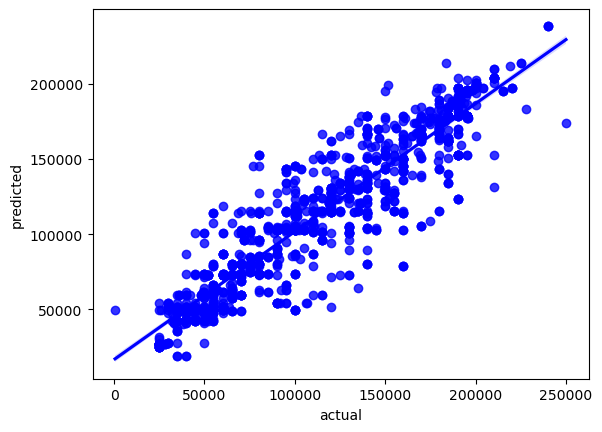

In [55]:
sns.regplot(data=output,x = 'actual',y='predicted',color='blue')
plt.show()

### Save the model

In [56]:
model_filename = 'MODEL.pkl'
with open(model_filename, 'wb')as file:
    pickle.dump(model,file)